<a href="https://colab.research.google.com/github/Trodenn/Lboro_Ai_principles_group_project/blob/main/Sadaf%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
from google.colab import files
uploaded = files.upload()  # Upload the dataset
data = pd.read_csv(next(iter(uploaded)))

# Display basic information
print(data.info())
data.head()


Saving diabetes.csv to diabetes (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# Identify columns with 0 values (excluding 'Pregnancies' and 'Outcome')
columns_with_zeros = [col for col in data.columns if (data[col] == 0).sum() > 0 and col not in ['Pregnancies', 'Outcome']]
zero_counts = {col: (data[col] == 0).sum() for col in columns_with_zeros}

print("Columns with zeros:", columns_with_zeros)
print("Count of zeros in each column:", zero_counts)


Columns with zeros: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
Count of zeros in each column: {'Glucose': 5, 'BloodPressure': 35, 'SkinThickness': 227, 'Insulin': 374, 'BMI': 11}


In [3]:
# Replace 0 values with mean and median in separate datasets
data_mean_replaced = data.copy()
data_median_replaced = data.copy()

for col in columns_with_zeros:
    mean_value = data[col].mean()
    median_value = data[col].median()
    data_mean_replaced[col] = data[col].replace(0, mean_value)
    data_median_replaced[col] = data[col].replace(0, median_value)

# Compare summary statistics
print("Original Data Statistics:\n", data[columns_with_zeros].describe())
print("Mean Replaced Data Statistics:\n", data_mean_replaced[columns_with_zeros].describe())
print("Median Replaced Data Statistics:\n", data_median_replaced[columns_with_zeros].describe())


Original Data Statistics:
           Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  768.000000     768.000000     768.000000  768.000000  768.000000
mean   120.894531      69.105469      20.536458   79.799479   31.992578
std     31.972618      19.355807      15.952218  115.244002    7.884160
min      0.000000       0.000000       0.000000    0.000000    0.000000
25%     99.000000      62.000000       0.000000    0.000000   27.300000
50%    117.000000      72.000000      23.000000   30.500000   32.000000
75%    140.250000      80.000000      32.000000  127.250000   36.600000
max    199.000000     122.000000      99.000000  846.000000   67.100000
Mean Replaced Data Statistics:
           Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  768.000000     768.000000     768.000000  768.000000  768.000000
mean   121.681605      72.254807      26.606479  118.660163   32.450805
std     30.436016      12.115932       9.631241   93.080358    6.875374
min  

In [4]:
# Replace 0 values with mean and median in separate datasets
data_mean_replaced = data.copy()
data_median_replaced = data.copy()

for col in columns_with_zeros:
    mean_value = data[col].mean()
    median_value = data[col].median()
    data_mean_replaced[col] = data[col].replace(0, mean_value)
    data_median_replaced[col] = data[col].replace(0, median_value)

# Compare summary statistics
print("Original Data Statistics:\n", data[columns_with_zeros].describe())
print("Mean Replaced Data Statistics:\n", data_mean_replaced[columns_with_zeros].describe())
print("Median Replaced Data Statistics:\n", data_median_replaced[columns_with_zeros].describe())


Original Data Statistics:
           Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  768.000000     768.000000     768.000000  768.000000  768.000000
mean   120.894531      69.105469      20.536458   79.799479   31.992578
std     31.972618      19.355807      15.952218  115.244002    7.884160
min      0.000000       0.000000       0.000000    0.000000    0.000000
25%     99.000000      62.000000       0.000000    0.000000   27.300000
50%    117.000000      72.000000      23.000000   30.500000   32.000000
75%    140.250000      80.000000      32.000000  127.250000   36.600000
max    199.000000     122.000000      99.000000  846.000000   67.100000
Mean Replaced Data Statistics:
           Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  768.000000     768.000000     768.000000  768.000000  768.000000
mean   121.681605      72.254807      26.606479  118.660163   32.450805
std     30.436016      12.115932       9.631241   93.080358    6.875374
min  

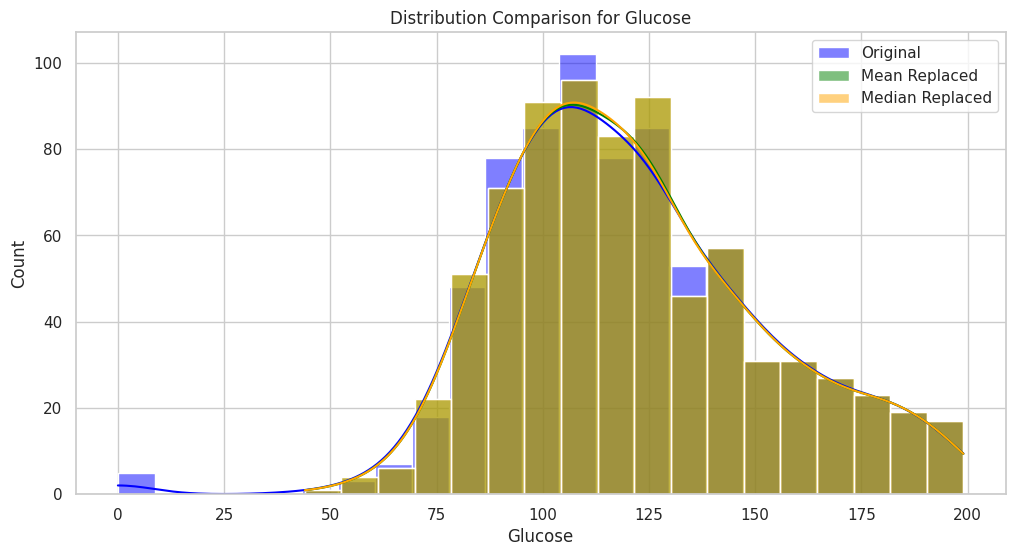

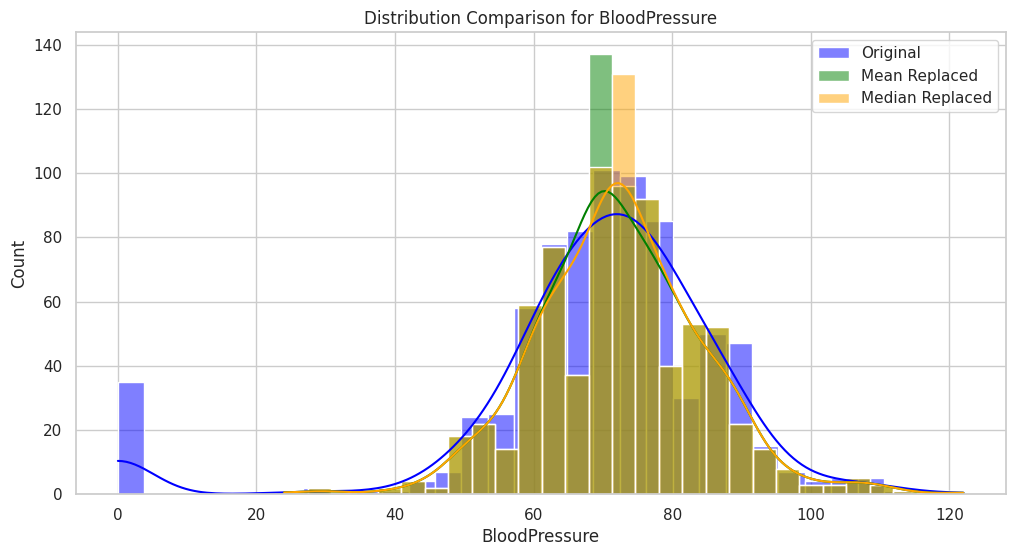

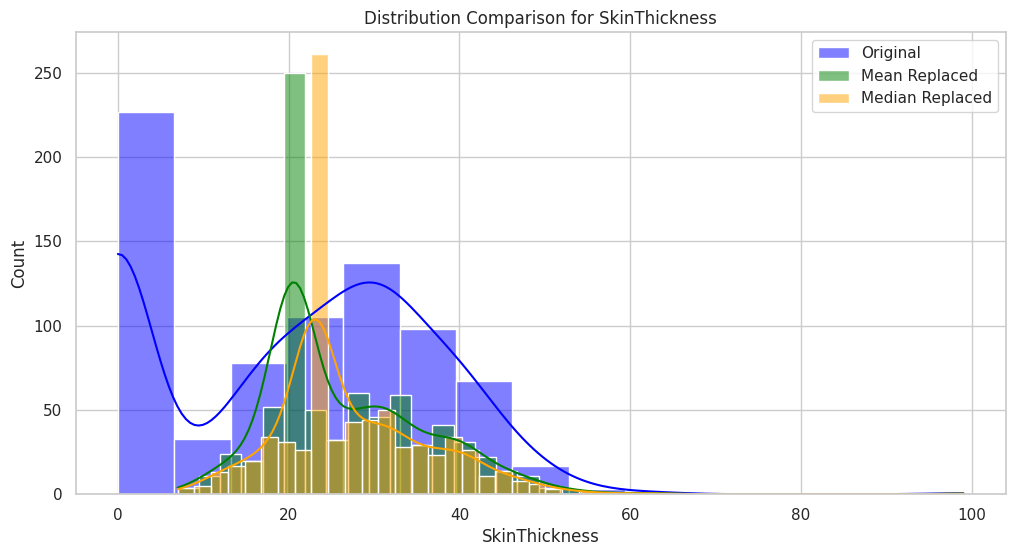

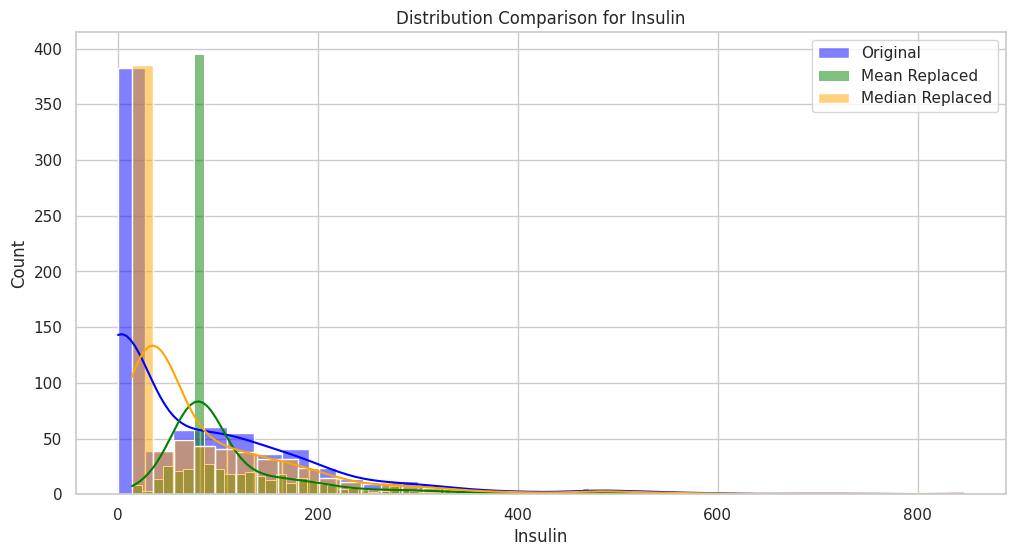

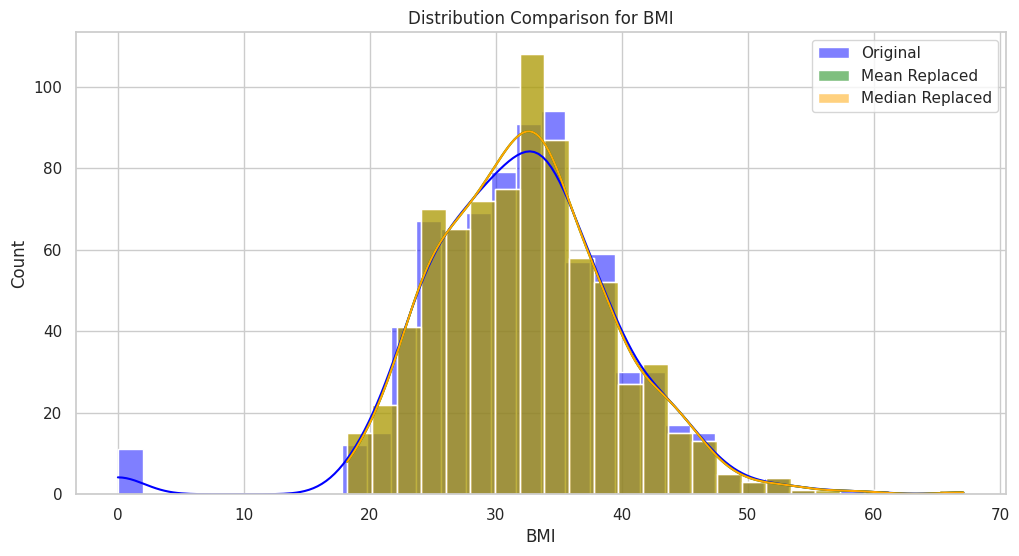

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Plot histograms for each column before and after replacements
for col in columns_with_zeros:
    plt.figure(figsize=(12, 6))
    sns.histplot(data[col], label='Original', color='blue', kde=True)
    sns.histplot(data_mean_replaced[col], label='Mean Replaced', color='green', kde=True)
    sns.histplot(data_median_replaced[col], label='Median Replaced', color='orange', kde=True)
    plt.title(f"Distribution Comparison for {col}")
    plt.legend()
    plt.show()


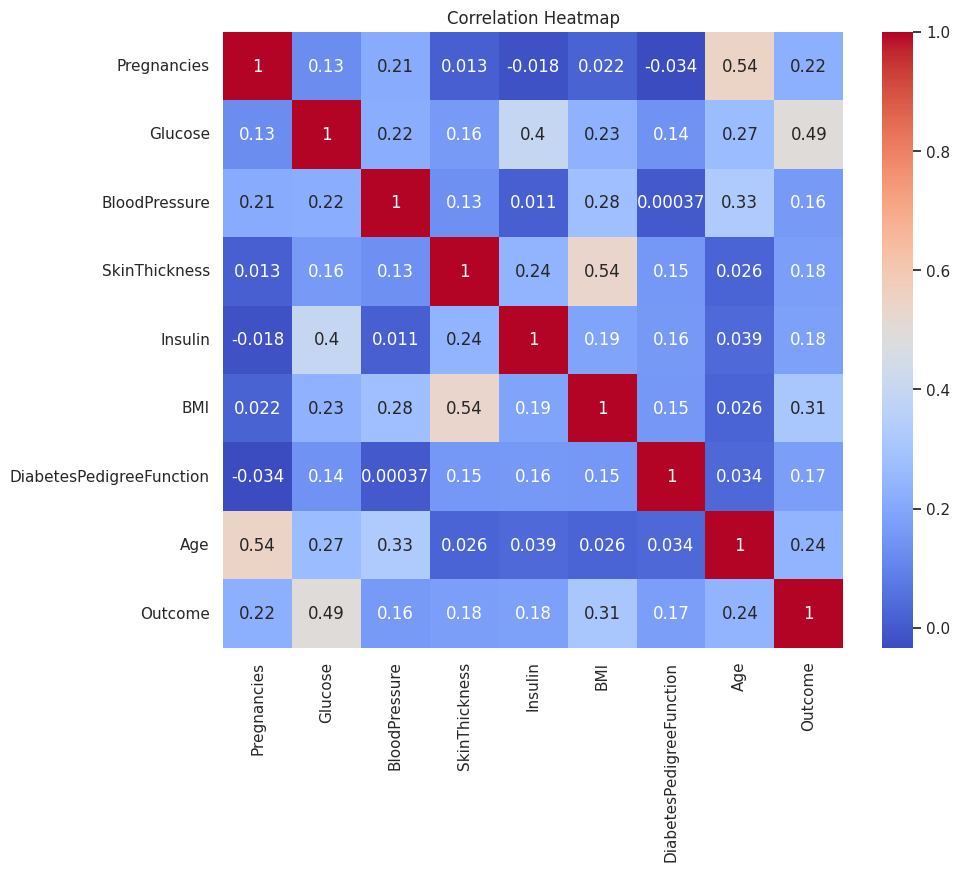

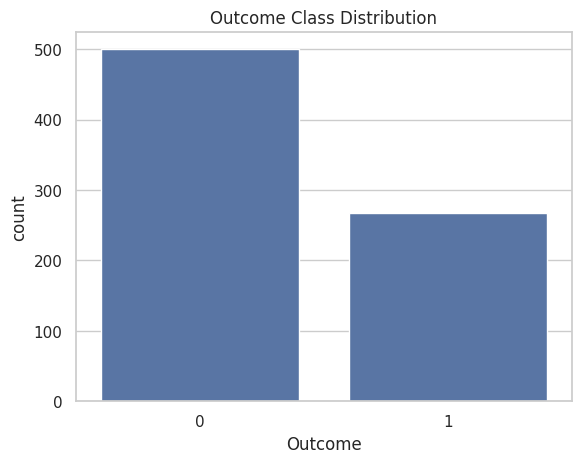

In [6]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_mean_replaced.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Outcome class distribution
sns.countplot(x='Outcome', data=data)
plt.title("Outcome Class Distribution")
plt.show()


In [7]:
# Example Feature Engineering
data['BMI_Category'] = pd.cut(data['BMI'], bins=[0, 18.5, 25, 30, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
data['Glucose_Insulin_Ratio'] = data['Glucose'] / (data['Insulin'] + 1)  # Avoid division by zero
print(data[['BMI_Category', 'Glucose_Insulin_Ratio']].head())


  BMI_Category  Glucose_Insulin_Ratio
0        Obese             148.000000
1   Overweight              85.000000
2       Normal             183.000000
3   Overweight               0.936842
4        Obese               0.810651


In [8]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split the data into features and target
X = data_mean_replaced.drop('Outcome', axis=1)  # Use the mean-replaced data
y = data_mean_replaced['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[120  31]
 [ 29  51]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.64      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231


Accuracy Score: 0.7402597402597403


In [9]:
# Split the data into features and target
X = data_median_replaced.drop('Outcome', axis=1)  # Use the median-replaced data
y = data_median_replaced['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[124  27]
 [ 25  55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.83       151
           1       0.67      0.69      0.68        80

    accuracy                           0.77       231
   macro avg       0.75      0.75      0.75       231
weighted avg       0.78      0.77      0.78       231


Accuracy Score: 0.7748917748917749


In [10]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Apply the imputer to the dataset
data_knn_replaced = pd.DataFrame(knn_imputer.fit_transform(data), columns=data.columns)

# Split the data into features and target
X = data_knn_replaced.drop('Outcome', axis=1)  # Use the KNN-imputed data
y = data_knn_replaced['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


ValueError: could not convert string to float: 'Obese'

In [13]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Exclude the categorical column before imputation
data_numeric = data.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns

# Initialize the KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputer to numeric columns
data_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(data_numeric), columns=data_numeric.columns)

# If the categorical column exists, add it back after imputation
if 'BMI_Category' in data.columns:
    data_knn_imputed['BMI_Category'] = data['BMI_Category']

# Split the data into features and target
X = data_knn_imputed.drop('Outcome', axis=1)  # Use KNN-imputed data
y = data_knn_imputed['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


ValueError: could not convert string to float: 'Normal'

In [14]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Remove non-numeric columns entirely
data_numeric = data.select_dtypes(include=['float64', 'int64'])  # Select numeric columns only

# Initialize the KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputer
data_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(data_numeric), columns=data_numeric.columns)

# Split the data into features and target
X = data_knn_imputed.drop('Outcome', axis=1)  # Use KNN-imputed data
y = data_knn_imputed['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[121  30]
 [ 32  48]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.80      0.80       151
         1.0       0.62      0.60      0.61        80

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231


Accuracy Score: 0.7316017316017316
